# Decision tree and Random Forest (Ensemble Learning)

### You must tune the hyperparameters of these models using gridsearch or cross-validation. 
### The tuning step is omitted in this notebook

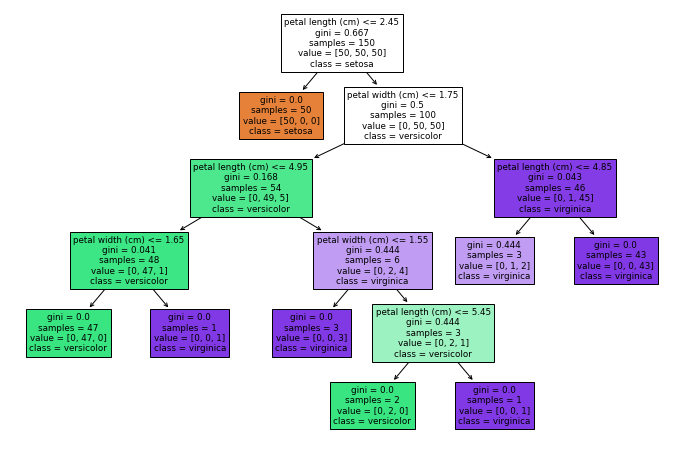

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data[:, 2:4]  
y = iris.target
# you should split data which is not shown here using train test split
clf = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()


### Predicting probabilities from a decision tree


In [15]:
X.shape

(150, 2)

In [24]:
X[123]

array([4.9, 1.8])

In [23]:
y[123]

2

In [25]:
clf.predict_proba(np.array([[4.9, 1.0]]))

array([[0., 1., 0.]])

In [26]:
X[0]

array([1.4, 0.2])

In [27]:
y[0]

0

In [28]:
clf.predict_proba(np.array([[1.4, 0.2]]))

array([[1., 0., 0.]])

# regressing petal width from the three other features via decision tree

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

iris = load_iris()
X = iris.data[:, :3]  # only sepal length, sepal width, and petal length features
y = iris.data[:, 3]   # only petal width as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 0.0435
R^2 Score: 0.9317


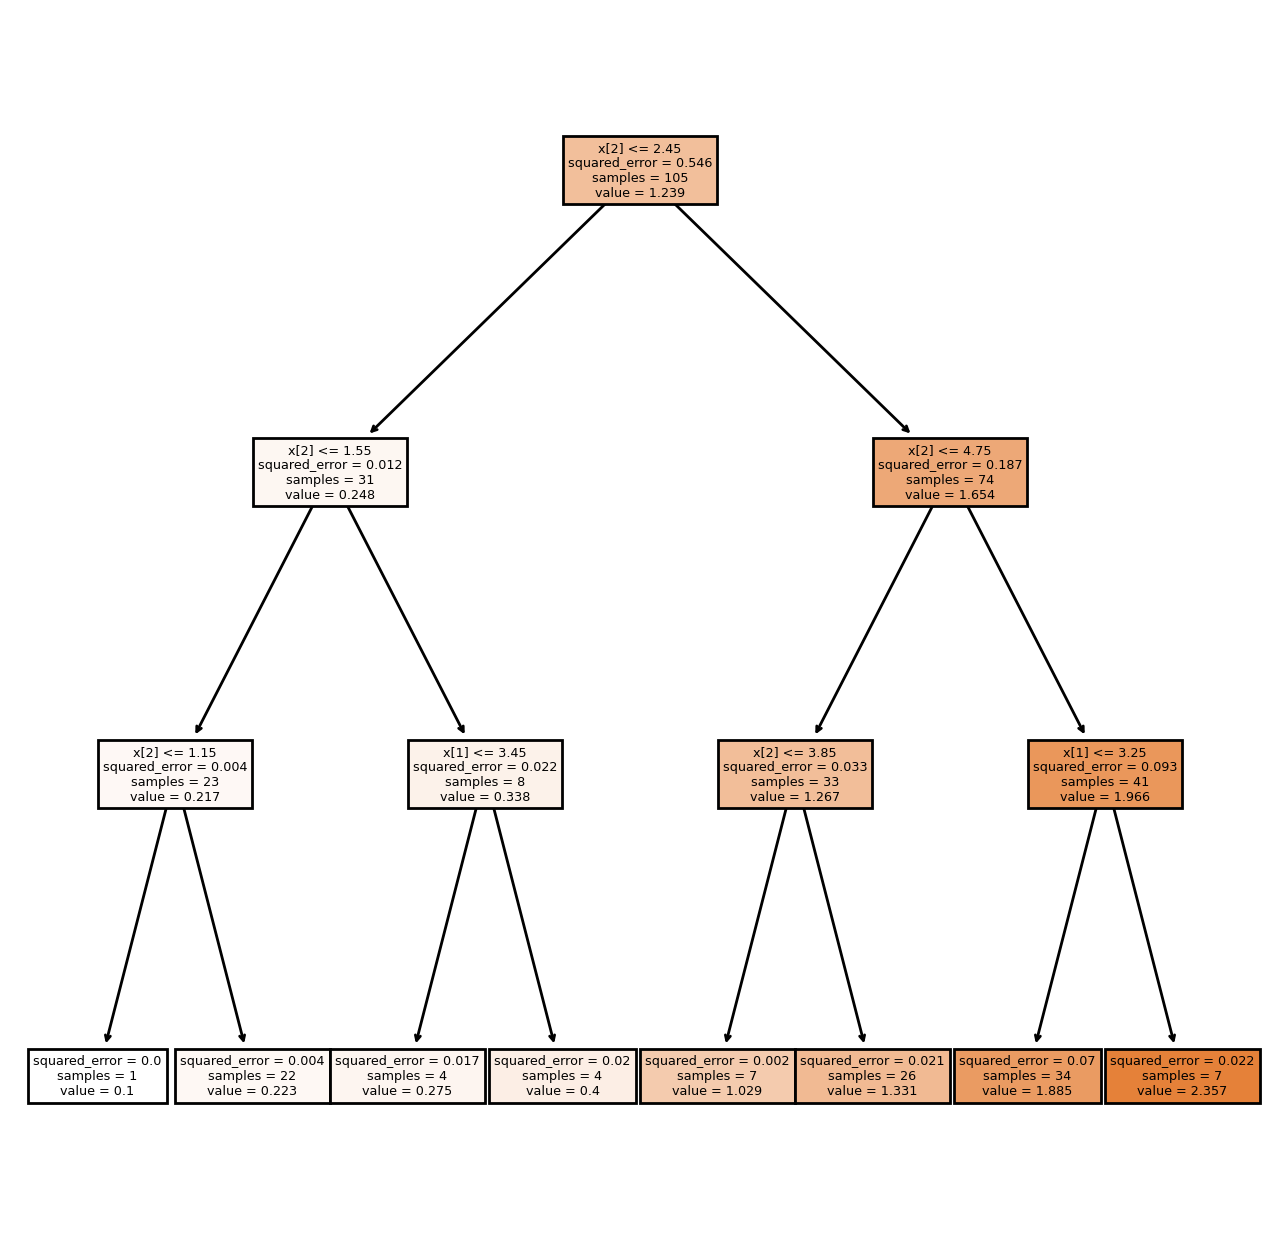

In [148]:
plt.figure(figsize=(8,8),dpi=200)
plot_tree(regr, filled=True);


### Majority Voting Classifiers using the moons dataset



In [98]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.25, random_state=0)
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)

(200, 2)
(200,)


In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X, y)



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [94]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf, dt_clf, voting_clf): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 


LogisticRegression 0.8333333333333334
SVC 0.9833333333333333
DecisionTreeClassifier 0.9666666666666667
VotingClassifier 0.9666666666666667


# bagging(set bootstrap=True) and pasting(set booststrap=False)
BaggingRegressor is also available for regression problems.

In [114]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.5, random_state=0)
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)

(500, 2)
(500,)


Accuracy score: 0.8
Out-of-bag score: 0.7828571428571428


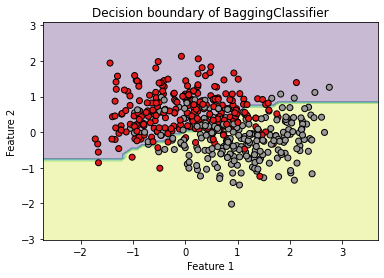

In [120]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=10, bootstrap=True, n_jobs=-1,random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Out-of-bag score:', bag_clf.oob_score_)

xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

# Predict the classes for each point in the meshgrid
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions and plot the decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary of BaggingClassifier')
plt.show()

0.7266666666666667


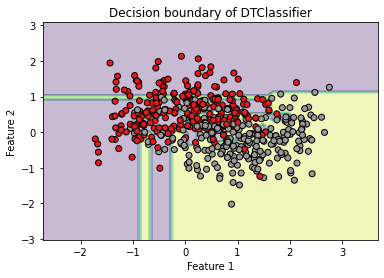

In [116]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score


dt_clf = DecisionTreeClassifier(max_depth=None,random_state=0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

# Predict the classes for each point in the meshgrid
Z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary of DTClassifier')
plt.show()

# Random forest classifier



In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.7, random_state=0)
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)



(300, 2)
(300,)


In [2]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))


xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

# Predict the classes for each point in the meshgrid
Z = rnd_clf.predict(np.c_[xx.ravel(), yy.ravel()])ii

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary of Random Forest Classifier')
plt.show()

NameError: name 'accuracy_score' is not defined

### Equivalent bagging classifier



0.7888888888888889


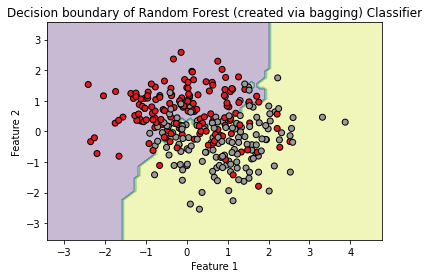

In [132]:
 
from sklearn.ensemble import RandomForestClassifier
bag_clf = BaggingClassifier(
         DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
         n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred_bg = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_bg))


xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

# Predict the classes for each point in the meshgrid
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary of Random Forest (created via bagging) Classifier')
plt.show()

## Plotting the trees in the forest using 4 trees only to keep things manageable



0.7555555555555555


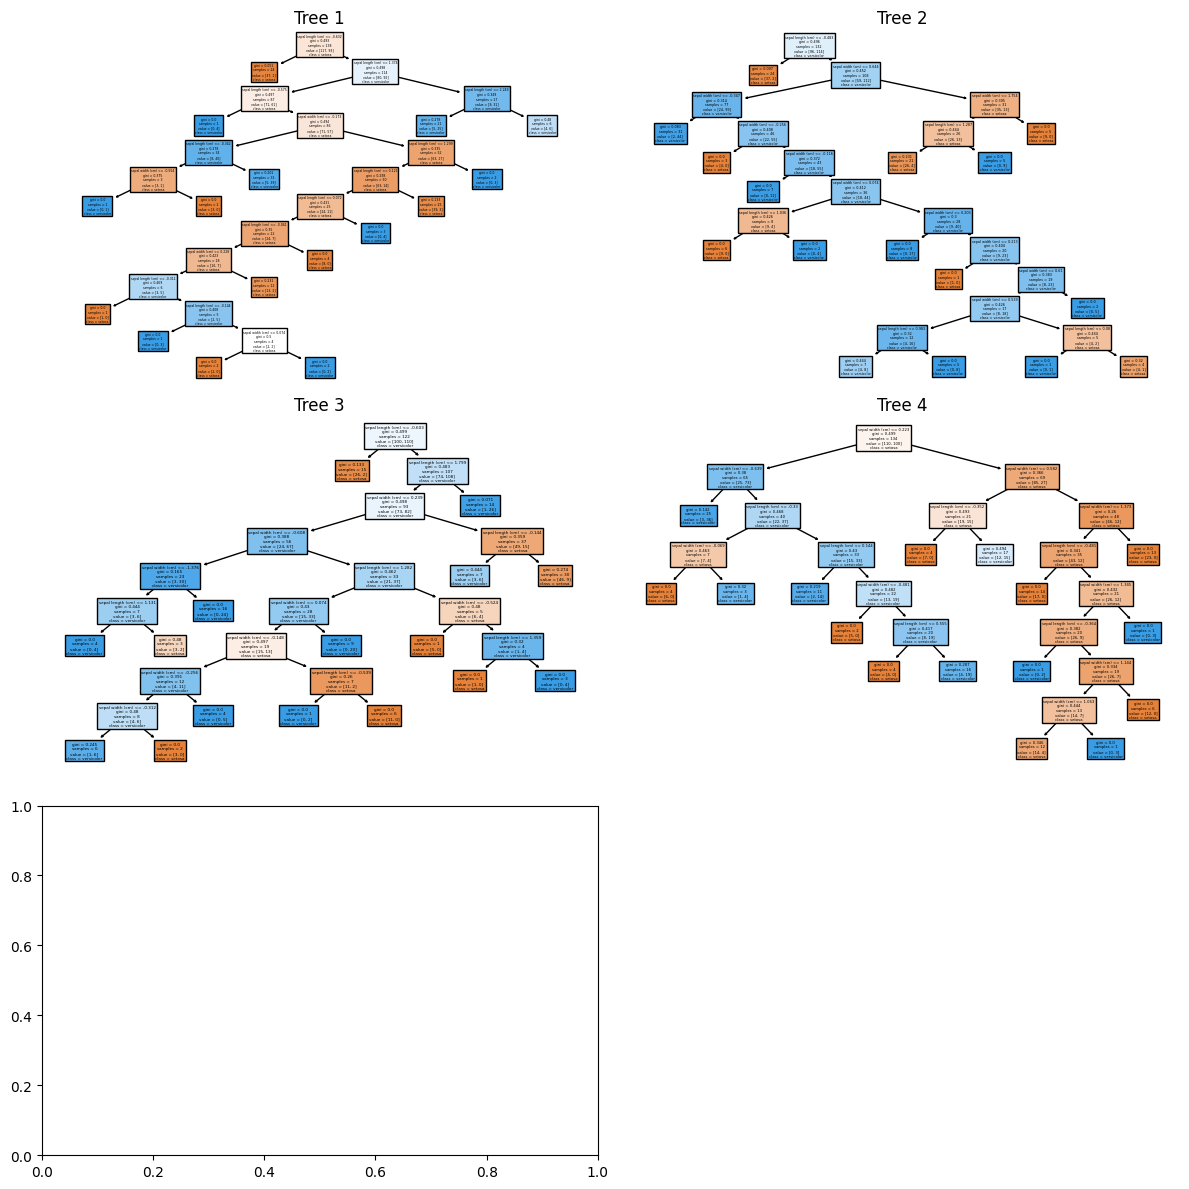

In [158]:

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=4, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))



fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), dpi=100)
axes = axes.ravel()

for i, tree in enumerate(rnd_clf.estimators_):
    plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axes[i])
    axes[i].set_title(f"Tree {i + 1}")


# Remove empty subplots
for i in range(n_trees, n_cols * n_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Using random forest for feature importance

In [134]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_): 
    print(name, score)
    



sepal length (cm) 0.10423920084250583
sepal width (cm) 0.02302375138279011
petal length (cm) 0.4449934305933826
petal width (cm) 0.42774361718132153


In [137]:
print(np.sum(rnd_clf.feature_importances_)) # scores will sum to one

1.0


### observing pixel importance

/home/reshad812/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


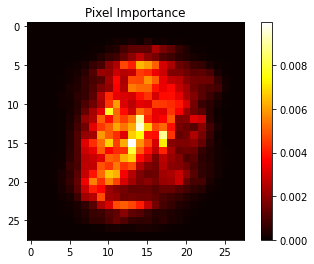

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_.reshape(28,28)

plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Pixel Importance")
plt.show()


## Regressing petal width using RandomForestRegressor

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

iris = load_iris()
X = iris.data[:, :3]  # only sepal length, sepal width, and petal length features
y = iris.data[:, 3]   # only petal width as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = RandomForestRegressor(max_depth=3)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 0.0301
R^2 Score: 0.9528


## regressing petal width XGBoost regressor

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from xgboost import XGBRegressor  # Import XGBRegressor from xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

iris = load_iris()
X = iris.data[:, :3]  # Select sepal length, sepal width, and petal length features
y = iris.data[:, 3]   # Select petal width as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = XGBRegressor()  
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 0.0502
R^2 Score: 0.9210


In [163]:
# !pip install xgboost

## regressing petal width using AdaBoostRegressor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

iris = load_iris()
X = iris.data[:, :3]  # Select sepal length, sepal width, and petal length features
y = iris.data[:, 3]   # Select petal width as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = AdaBoostRegressor()  
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
